In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

### **Agregando los dtypes de antemano se hace mas liviano el uso de memoria**

In [2]:
dtypes_auc = { "auction_type_id": np.float16, "country": "category", "platform": "category", "ref_type_id": "category", 
               "source_id": "category", "device_id": "category"}

dtypes_clk = { "advertiser_id": np.int8, "action_id": np.float16, "source_id": np.int8, "country_code": "category", 
               "latitude": np.float16, "longitude": np.float16, "wifi_connection": "category", "carrier_id": np.float16,
               "trans_id": "object", "os_major":np.float32, "brand": np.float16, "touchX": np.float16,
               "touchY": np.float16  }

### **Use los csv en una carpeta llamada data, por eso es distinta ruta**

In [3]:
auctions = pd.read_csv('data/auctions.csv.gzip', compression = 'gzip', dtype=dtypes_auc)
clicks = pd.read_csv('data/clicks.csv.gzip', compression = 'gzip', dtype=dtypes_clk)
events = pd.read_csv('data/events.csv.gzip', compression = 'gzip')
installs = pd.read_csv('data/installs.csv.gzip', compression = 'gzip')
target_competencia = pd.read_csv('data/target_competencia.csv')

/home/santy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Tarda aproximadamente 3 minutos en levantar. 3,6 GB en RAM.

In [4]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [5]:
auctions['auction_type_id'].count()

0

In [6]:
del(auctions['auction_type_id'])

In [7]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 6 columns):
country        category
date           object
device_id      category
platform       category
ref_type_id    category
source_id      category
dtypes: category(5), object(1)
memory usage: 310.2+ MB


In [8]:
auctions['date'] = pd.to_datetime(auctions['date'])

In [9]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 6 columns):
country        category
date           datetime64[ns]
device_id      category
platform       category
ref_type_id    category
source_id      category
dtypes: category(5), datetime64[ns](1)
memory usage: 310.2 MB


In [10]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.206055,1.070312,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.904785,0.078003,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218750,1.071289,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.206055,1.070312,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.945801,0.472900,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.206055,1.070312,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035004,0.430908,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.206055,1.070312,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.053986,0.423096,1891515180541284343,4368617728156436525


In [11]:
print(clicks['action_id'].count())
print(clicks['agent_device'].count())
print(clicks['brand'].count())

0
3243
6235


In [12]:
del(clicks['action_id'])

In [13]:
clicks['created'] = pd.to_datetime(clicks['created'])

In [14]:
clicks.specs_brand.unique()

array([2733035977666442898,  392184377613098015, 8930605132947907029,
       3855167788531275156, 5675295985273558497])

In [15]:
clicks.ref_type.unique()

array([1891515180541284343, 1494519392962156891, 5016171802147987303,
       6323871695571587575])

In [16]:
for col in ['advertiser_id', 'source_id', 'country_code', 'latitude', 'longitude', 'wifi_connection', 'carrier_id', 'os_minor', 'os_major', 'specs_brand', 'ref_type']:
    clicks[col] = clicks[col].astype('category')

In [17]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 19 columns):
advertiser_id      26351 non-null category
source_id          26351 non-null category
created            26351 non-null datetime64[ns]
country_code       26351 non-null category
latitude           26351 non-null category
longitude          26351 non-null category
wifi_connection    26351 non-null category
carrier_id         26340 non-null category
trans_id           26351 non-null object
os_minor           26339 non-null category
agent_device       3243 non-null float64
os_major           26339 non-null category
specs_brand        26351 non-null category
brand              6235 non-null float16
timeToClick        22977 non-null float64
touchX             23011 non-null float16
touchY             23011 non-null float16
ref_type           26351 non-null category
ref_hash           26351 non-null int64
dtypes: category(11), datetime64[ns](1), float16(3), float64(2), int64(1), objec

## **Codigo para plotear el heatmap**

In [18]:
#redondeo decimales asi coinciden varios valores, sino son todos unicos
clicks['X'] = clicks['touchX'].round(1)
clicks['Y'] = clicks['touchY'].round(1)

clicks.head()


,advertiser_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,...,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,X,Y
0,2,4,2019-03-06 22:42:12.755,6333597102633388268,1.206055,1.070312,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,...,3.072849e+18,2733035977666442898,NaN,1.563,0.904785,0.078003,1891515180541284343,1904083516767779093,0.899902,0.099976
1,0,0,2019-03-08 10:24:30.641,6333597102633388268,1.218750,1.071289,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,...,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666,NaN,NaN
2,0,0,2019-03-08 15:24:16.069,6333597102633388268,1.206055,1.070312,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,...,3.072849e+18,392184377613098015,NaN,NaN,0.945801,0.472900,1891515180541284343,6958163894863846647,0.899902,0.500000
3,2,3,2019-03-06 03:08:51.543,6333597102633388268,1.206055,1.070312,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,...,3.072849e+18,2733035977666442898,NaN,19.013,0.035004,0.430908,1891515180541284343,4368617728156436525,0.000000,0.399902
4,2,3,2019-03-06 03:32:55.570,6333597102633388268,1.206055,1.070312,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,...,3.072849e+18,2733035977666442898,NaN,28.110,0.053986,0.423096,1891515180541284343,4368617728156436525,0.099976,0.399902


In [19]:
#me quedo solo con lo que me interesa y quito Nans mas adelante
filtered = clicks.filter(items=['X', 'Y'])

In [20]:
filtered = filtered.dropna()

In [21]:
#agrego una columna que contara apariciones
filtered['values'] = 1


In [22]:
#pivoteo cosmico
nuevo = filtered.pivot_table(index='X', columns='Y',values='values' ,fill_value=0, aggfunc=np.sum).T

#cambio el eje Y de descendente a ascendente, asi puedo graficar el 0,0 abajo a la izq
nuevo = nuevo.iloc[::-1]

nuevo.head()

X,0.0,0.0999755859375,0.199951171875,0.300048828125,0.39990234375,0.5,0.60009765625,0.7001953125,0.7998046875,0.89990234375,1.0
Y,,,,,,,,,,,
16.593750,0,0,0,0,0,1,0,0,0,0,0
16.296875,0,0,0,0,0,0,0,0,1,0,0
16.203125,0,0,0,0,0,0,0,0,1,0,0
16.000000,0,0,0,0,0,0,0,0,1,0,0
15.898438,0,0,0,0,0,0,0,0,1,0,0


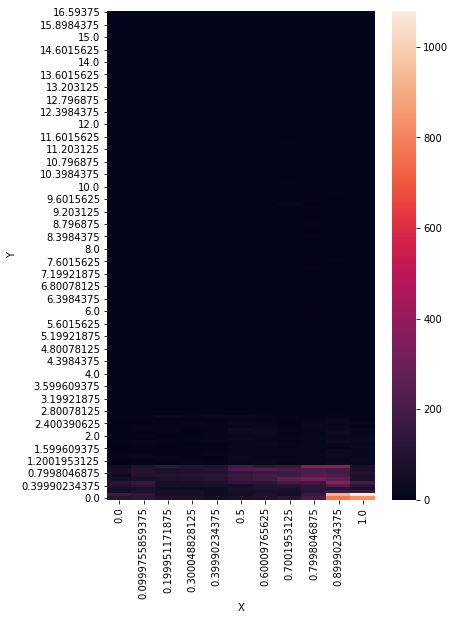

In [23]:
#resize del heatmap
plt.figure(figsize=(6, 9))

sns.heatmap(nuevo)

Veo informacion sobre la columna timeToClick

In [24]:
clicks['timeToClick'].describe()

count    22977.000000
mean       230.403309
std        976.849149
min          0.017000
25%          2.915000
50%         10.588000
75%         71.703000
max      17616.188000
Name: timeToClick, dtype: float64

Debido a la variacion de los datos, se trabajara con aquellos clicks que se hicieron en menos
de 75 segundos.

In [25]:
asd = clicks.loc[(clicks['timeToClick']) < 75, ['timeToClick']]
asd.head()

,timeToClick
0,1.563
3,19.013
4,28.110
8,3.129
9,1.707


Se puede ver que la tendencia es hacer el click rapidamente

([<matplotlib.axis.XTick at 0x7f7036c34b38>,
 <a list of 21 Text xticklabel objects>)

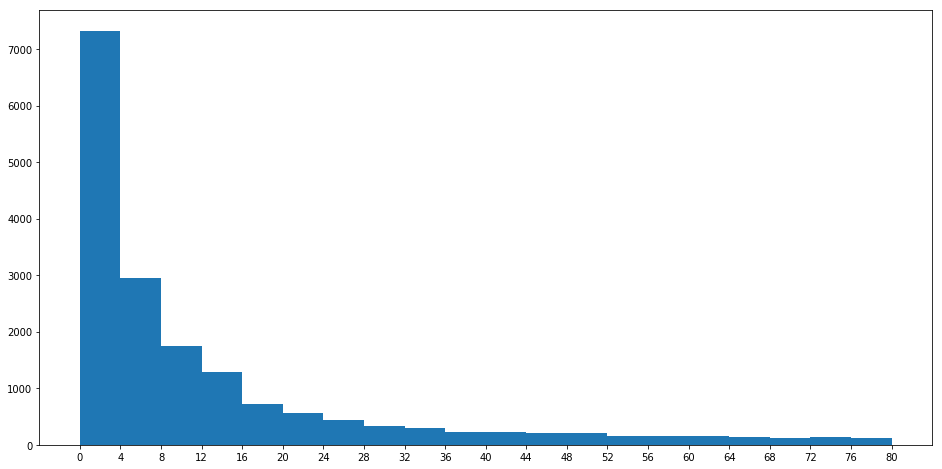

In [26]:
bins = np.linspace(0,80,21)
plt.figure(figsize=(16,8))
plt.hist(clicks.timeToClick, bins = bins)
plt.xticks(bins)